In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from citipy import citipy
from config import weather_api_key
from datetime import datetime


In [3]:
# Build URL for Weather API call using my weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-38.99762120992232, -114.79779909478252),
 (-34.0963765870367, 8.724380284482663),
 (-73.68571542815766, -161.67647245032245),
 (-4.987040729629541, 100.67485086152965),
 (-78.01594769587943, -158.39923335930254),
 (48.66600468046556, 42.05835429855409),
 (-89.26593502406021, -87.9527581782886),
 (67.53555836031742, -175.3541375368928),
 (-1.9675381399240166, 120.71892180024827),
 (59.94010562131379, 7.909906485375785),
 (-83.45695897305635, -164.29818111355596),
 (-38.485437877086476, -51.59645012835185),
 (40.385868801565096, 72.69582772426423),
 (-31.629423331572987, -58.74590081974732),
 (-37.6701860999655, 48.9046399673025),
 (-85.45098431352682, -52.248648617277496),
 (-30.33967808745288, 168.17817318346204),
 (-6.85075214723777, -179.87007858293336),
 (-8.04772003205872, -104.44926567939578),
 (51.33303544160992, -135.5819867614245),
 (19.100010891811124, 84.25201051786757),
 (-39.05600631487024, -116.2316572145458),
 (-5.857250158953846, -2.610123685152786),
 (64.946546389059

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | chernyshkovskiy
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | poso
Processing Record 9 of Set 1 | amot
Processing Record 10 of Set 1 | rocha
Processing Record 11 of Set 1 | andijon
Processing Record 12 of Set 1 | concordia
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | ahipara
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | ketchikan
Processing Record 18 of Set 1 | mandasa
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | turukhansk
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 

Processing Record 41 of Set 4 | valjala
City not found. Skipping...
Processing Record 42 of Set 4 | sistranda
Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | kidal
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | demba
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | saint george
Processing Record 1 of Set 5 | jaroslaw
Processing Record 2 of Set 5 | kaeng khlo
City not found. Skipping...
Processing Record 3 of Set 5 | khromtau
Processing Record 4 of Set 5 | galveston
Processing Record 5 of Set 5 | urdoma
Processing Record 6 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 5 | queimadas
Processing Record 8 of Set 5 | eyl
Processing Record 9 of Set 5 | sinkat
City not found. Skipping...
Processing Record 10 of Set 5 | huejuquilla el alto
Processing Record 11 of Se

Processing Record 24 of Set 8 | shaoyang
Processing Record 25 of Set 8 | tokur
Processing Record 26 of Set 8 | port hardy
Processing Record 27 of Set 8 | whitianga
Processing Record 28 of Set 8 | saint-leu
Processing Record 29 of Set 8 | nishihara
Processing Record 30 of Set 8 | tamale
Processing Record 31 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 32 of Set 8 | ramos arizpe
Processing Record 33 of Set 8 | jalu
Processing Record 34 of Set 8 | sept-iles
Processing Record 35 of Set 8 | benha
City not found. Skipping...
Processing Record 36 of Set 8 | ponta do sol
Processing Record 37 of Set 8 | cabo san lucas
Processing Record 38 of Set 8 | taseyevo
Processing Record 39 of Set 8 | haibowan
City not found. Skipping...
Processing Record 40 of Set 8 | usinsk
Processing Record 41 of Set 8 | krasnozerskoye
Processing Record 42 of Set 8 | qeshm
Processing Record 43 of Set 8 | ibb
Processing Record 44 of Set 8 | birin
Processing Record 45 of Set 8 | kamaishi
Processin

Processing Record 12 of Set 12 | maloshuyka
City not found. Skipping...
Processing Record 13 of Set 12 | aklavik
Processing Record 14 of Set 12 | pochutla
Processing Record 15 of Set 12 | roald
Processing Record 16 of Set 12 | nalut
Processing Record 17 of Set 12 | concepcion
Processing Record 18 of Set 12 | cooma
Processing Record 19 of Set 12 | isla aguada
Processing Record 20 of Set 12 | road town
Processing Record 21 of Set 12 | kirkuk
Processing Record 22 of Set 12 | taclobo
Processing Record 23 of Set 12 | tateyama
Processing Record 24 of Set 12 | northam
Processing Record 25 of Set 12 | tuatapere
Processing Record 26 of Set 12 | dagua
Processing Record 27 of Set 12 | hay river
Processing Record 28 of Set 12 | halalo
City not found. Skipping...
Processing Record 29 of Set 12 | havoysund
Processing Record 30 of Set 12 | los llanos de aridane
Processing Record 31 of Set 12 | boyolangu
Processing Record 32 of Set 12 | shenjiamen
Processing Record 33 of Set 12 | kibungo
Processing Re

In [10]:
len(city_data)

568

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.67,74,89,20.02,PF,2022-02-10 18:49:43
1,Saldanha,-33.0117,17.9442,68.05,80,0,11.18,ZA,2022-02-10 18:49:44
2,Mataura,-46.1927,168.8643,58.48,95,100,2.71,NZ,2022-02-10 18:49:44
3,Bengkulu,-3.8004,102.2655,75.96,75,100,5.44,ID,2022-02-10 18:49:45
4,Chernyshkovskiy,48.4219,42.2308,35.64,98,100,14.41,RU,2022-02-10 18:49:45
5,Ushuaia,-54.8000,-68.3000,49.62,76,75,29.93,AR,2022-02-10 18:45:52
6,Provideniya,64.3833,-173.3000,-19.73,92,46,3.29,RU,2022-02-10 18:49:46
7,Poso,-1.3959,120.7524,76.64,85,82,3.04,ID,2022-02-10 18:49:47
8,Amot,59.5714,7.9877,30.22,93,17,5.39,NO,2022-02-10 18:49:47
9,Rocha,-34.4833,-54.3333,81.43,44,0,15.48,UY,2022-02-10 18:47:26


In [12]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-02-10 18:49:43,-23.1203,-134.9692,78.67,74,89,20.02
1,Saldanha,ZA,2022-02-10 18:49:44,-33.0117,17.9442,68.05,80,0,11.18
2,Mataura,NZ,2022-02-10 18:49:44,-46.1927,168.8643,58.48,95,100,2.71
3,Bengkulu,ID,2022-02-10 18:49:45,-3.8004,102.2655,75.96,75,100,5.44
4,Chernyshkovskiy,RU,2022-02-10 18:49:45,48.4219,42.2308,35.64,98,100,14.41
5,Ushuaia,AR,2022-02-10 18:45:52,-54.8000,-68.3000,49.62,76,75,29.93
6,Provideniya,RU,2022-02-10 18:49:46,64.3833,-173.3000,-19.73,92,46,3.29
7,Poso,ID,2022-02-10 18:49:47,-1.3959,120.7524,76.64,85,82,3.04
8,Amot,NO,2022-02-10 18:49:47,59.5714,7.9877,30.22,93,17,5.39
9,Rocha,UY,2022-02-10 18:47:26,-34.4833,-54.3333,81.43,44,0,15.48


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

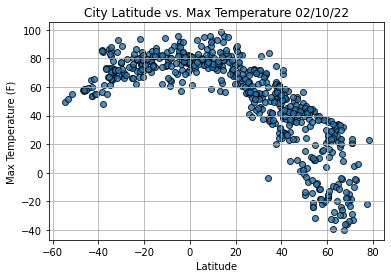

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

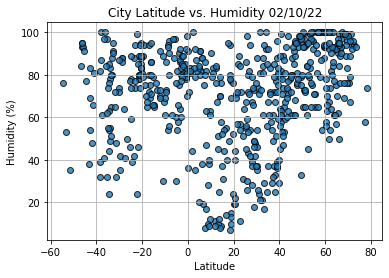

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

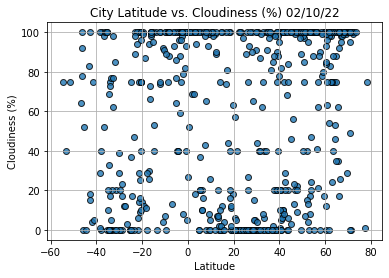

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

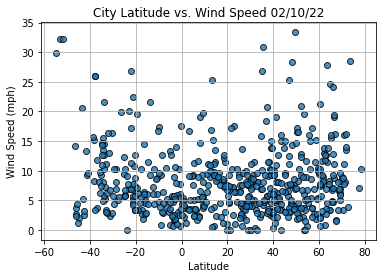

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()